In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
df_D = pd.read_csv('https://cocl.us/datascience_survey_data',index_col= 0)

In [3]:
df_D

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

print('loaded')

loaded


In [5]:
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0
mpl.style.use(['ggplot']) # optional: for ggplot-like style

Matplotlib version:  3.0.1


In [6]:
df_D.sort_values(['Very interested'],ascending=False, axis=0, inplace=True)


In [7]:
cols = ['Very interested', 'Somewhat interested', 'Not interested']
df_D[cols] = df_D[cols].div(df_D[cols].sum(axis=1), axis=0)

In [8]:
df_D

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,0.770073,0.202555,0.027372
Machine Learning,0.747248,0.218807,0.033945
Data Visualization,0.615809,0.337316,0.046875
Big Data (Spark / Hadoop),0.608775,0.333181,0.058044
Deep Learning,0.582296,0.355002,0.062702
Data Journalism,0.202358,0.509906,0.287736


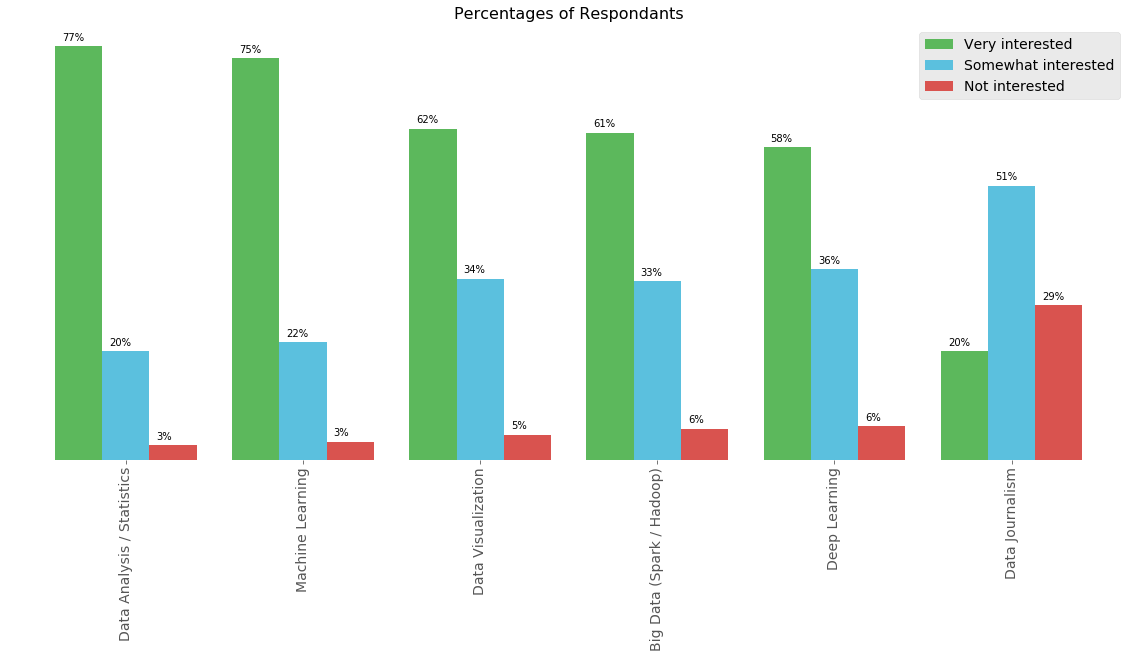

In [9]:
ax = df_D.plot(kind='bar', alpha=1,stacked = False, figsize=(20, 8),width= 0.8,color =['#5cb85c', '#5bc0de', '#d9534f'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.15*width, p.get_y() + height + 0.01))
ax.set_title('Percentages of Respondants',fontsize = 16)
ax.legend(fontsize= 14)
ax.tick_params(axis='x', labelsize=14)



ax.set_frame_on(False)
ax.get_yaxis().set_visible(False)


In [10]:
df_SC= pd.read_csv('https://cocl.us/sanfran_crime_dataset')
df_SC.head()


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [11]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cryptography-2.4.2         |   py36h1ba5d50_0         618 KB
    openssl-1.1.1a             |    h14c3975_1000         4.0 MB  conda-forge
    libarchive-3.3.3           |       h5d8350f_5         1.5 MB
    grpcio-1.16.1              |   py36hf8bcb03_1         1.1 MB
    conda-4.6.2                |           py36_0         869 KB  conda-forge
    libssh2-1.8.0              |                1         239 KB  conda-forge
    python-3.6.8               |       h0371630_0        34.4 MB
    ------------------------------------------------------------
                                           Total:        42.6 MB

The following packages will be UPDATED:

    conda:        4.5.12-py36_1000         conda

In [12]:
df_SC.shape

(150500, 13)

In [34]:
df_SCC= df_SC.PdDistrict.value_counts().reset_index(name='Count')
df_SCC.rename(columns={'index': 'Neighbourhood'}, inplace=True)
df_SCC

,Neighbourhood,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


In [35]:
!wget --quiet https://cocl.us/sanfran_geojson -O sanF.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [36]:
sanF_geo = r'sanF.json'
sanF_map = folium.Map(location=[37.773972, -122.431297], zoom_start=11,tiles= 'Mapbox Bright')


In [37]:
sanF_map.choropleth(
    geo_data=sanF_geo,
    data=df_SCC,
    columns=['Neighbourhood', 'Count'],
    key_on = 'Feature.properties.District',
    fill_color ='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='San Fransisco Crime Rate'
)

# display map
sanF_map

AttributeError: 'NoneType' object has no attribute 'get'